# Hypothesis Testing

- Does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?

- Do some movie genres earn more revenue than others?

- Does the month of release affect revenue?

## Concanteate API Calls for years 2010 - 2019

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

import os, time, json
from scipy import stats

import pymysql
pymysql.install_as_MySQLdb()

from sqlalchemy import create_engine
from sqlalchemy_utils import create_database, database_exists

import warnings
warnings.filterwarnings('ignore')

plt.style.use(['seaborn-muted','fivethirtyeight'])
sns.set_context('talk')


In [2]:
## Checking what data we already have in our Data folder using os.listdir
import os
FOLDER = 'Data/HYPOTHESIS TESTING - Years'
file_list = sorted(os.listdir(FOLDER))
file_list



['.ipynb_checkpoints']

In [3]:
year2010 = r"C:\Users\admin\Documents\GitHub\IMDB-Movies-Analysis\Data\HYPOTHESIS TESTING - Yearsfinal_tmdb_data_2010.csv.gz"

# Import year 2010 dataset
year2010 = pd.read_csv(year2010)

year2010.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2730 entries, 0 to 2729
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2730 non-null   object 
 1   adult                  2729 non-null   float64
 2   backdrop_path          1509 non-null   object 
 3   belongs_to_collection  193 non-null    object 
 4   budget                 2729 non-null   float64
 5   genres                 2729 non-null   object 
 6   homepage               792 non-null    object 
 7   id                     2729 non-null   float64
 8   original_language      2729 non-null   object 
 9   original_title         2729 non-null   object 
 10  overview               2653 non-null   object 
 11  popularity             2729 non-null   float64
 12  poster_path            2362 non-null   object 
 13  production_companies   2729 non-null   object 
 14  production_countries   2729 non-null   object 
 15  rele

In [4]:
# Save years 2011-2019

year2011 = r"C:\Users\admin\Documents\GitHub\IMDB-Movies-Analysis\Data\HYPOTHESIS TESTING - Yearsfinal_tmdb_data_2011.csv.gz"
year2012 = r"C:\Users\admin\Documents\GitHub\IMDB-Movies-Analysis\Data\HYPOTHESIS TESTING - Yearsfinal_tmdb_data_2012.csv.gz"
year2013 = r"C:\Users\admin\Documents\GitHub\IMDB-Movies-Analysis\Data\HYPOTHESIS TESTING - Yearsfinal_tmdb_data_2013.csv.gz"
year2014 = r"C:\Users\admin\Documents\GitHub\IMDB-Movies-Analysis\Data\HYPOTHESIS TESTING - Yearsfinal_tmdb_data_2014.csv.gz"
year2015 = r"C:\Users\admin\Documents\GitHub\IMDB-Movies-Analysis\Data\HYPOTHESIS TESTING - Yearsfinal_tmdb_data_2015.csv.gz"
year2016 = r"C:\Users\admin\Documents\GitHub\IMDB-Movies-Analysis\Data\HYPOTHESIS TESTING - Yearsfinal_tmdb_data_2016.csv.gz"
year2017 = r"C:\Users\admin\Documents\GitHub\IMDB-Movies-Analysis\Data\HYPOTHESIS TESTING - Yearsfinal_tmdb_data_2017.csv.gz"
year2018 = r"C:\Users\admin\Documents\GitHub\IMDB-Movies-Analysis\Data\HYPOTHESIS TESTING - Yearsfinal_tmdb_data_2018.csv.gz"
year2019 = r"C:\Users\admin\Documents\GitHub\IMDB-Movies-Analysis\Data\HYPOTHESIS TESTING - Yearsfinal_tmdb_data_2019.csv.gz"


In [5]:
# Import year 2011-2019 datasets
year2011 = pd.read_csv(year2011)
year2012 = pd.read_csv(year2012)
year2013 = pd.read_csv(year2013)
year2014 = pd.read_csv(year2014)
year2015 = pd.read_csv(year2015)
year2016 = pd.read_csv(year2016)
year2017 = pd.read_csv(year2017)
year2018 = pd.read_csv(year2018)
year2019 = pd.read_csv(year2019)

In [6]:
# Combine years 
df = pd.concat([year2010, year2011, year2012, year2013, year2014, year2015, year2016, year2017, year2018, year2019])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38409 entries, 0 to 4905
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                38409 non-null  object 
 1   adult                  38399 non-null  float64
 2   backdrop_path          25695 non-null  object 
 3   belongs_to_collection  2556 non-null   object 
 4   budget                 38399 non-null  float64
 5   genres                 38399 non-null  object 
 6   homepage               10093 non-null  object 
 7   id                     38399 non-null  float64
 8   original_language      38399 non-null  object 
 9   original_title         38399 non-null  object 
 10  overview               37605 non-null  object 
 11  popularity             38399 non-null  float64
 12  poster_path            35722 non-null  object 
 13  production_companies   38399 non-null  object 
 14  production_countries   38399 non-null  object 
 15  release_

Data appears to have loaded correctly!

In [7]:
# Including only movies with budget and revenue greater than 0
df_movie_values = df[(df['budget'] > 0) | (df['revenue'] > 0)]
df_movie_values.describe()

,adult,budget,id,popularity,revenue,runtime,video,vote_average,vote_count
count,8420.000000,8.420000e+03,8.420000e+03,8420.000000,8.420000e+03,8420.000000,8420.000000,8420.000000,8420.000000
mean,0.000831,1.188425e+07,3.325369e+05,11.701959,3.524459e+07,100.318290,0.007007,5.392083,884.242280
std,0.028823,3.134704e+07,2.089246e+05,16.586334,1.313355e+08,26.869998,0.083420,2.202804,2488.124208
min,0.000000,0.000000e+00,1.890000e+02,0.600000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000e+03,1.500190e+05,1.754750,0.000000e+00,89.000000,0.000000,4.800000,5.000000
50%,0.000000,8.000000e+05,3.264870e+05,6.997000,2.204700e+04,98.000000,0.000000,6.000000,55.000000
75%,0.000000,8.000000e+06,4.672568e+05,15.634000,8.108007e+06,111.000000,0.000000,6.777000,487.250000
max,1.000000,3.790000e+08,1.177535e+06,612.272000,2.800000e+09,1265.000000,1.000000,10.000000,34430.000000


## Exploratory Data Analysis

In [8]:
# Print statement for new dataframe
print(f"Movies with budget and revenue values greater than 0: {len(df_movie_values)}")

Movies with budget and revenue values greater than 0: 8420


**- There are 8420 movies with budget and revenue values greater than 0**

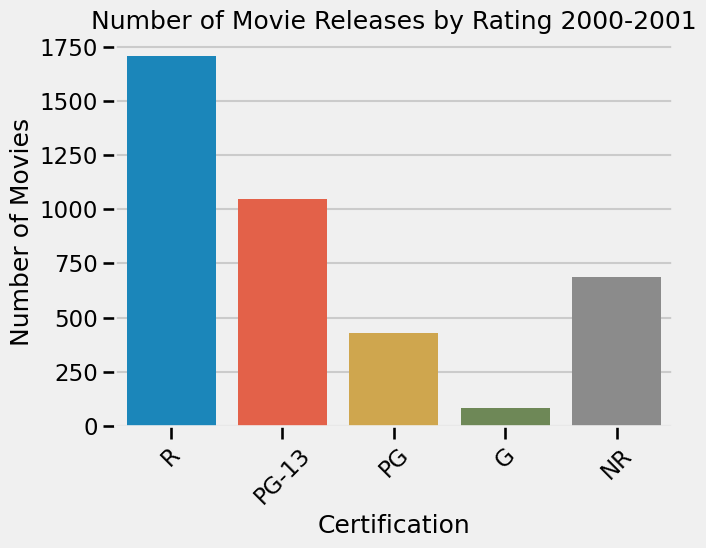

In [9]:
cert_index= ["R", "PG-13", "PG", "G", "NR" ]


# Create a count plot
sns.countplot(data=df_movie_values, x='certification', order= cert_index)
plt.xticks(rotation=45) 
plt.xlabel("Certification") 
plt.ylabel("Number of Movies")
plt.title("Number of Movie Releases by Rating 2000-2001")

# Show the plot
plt.show()

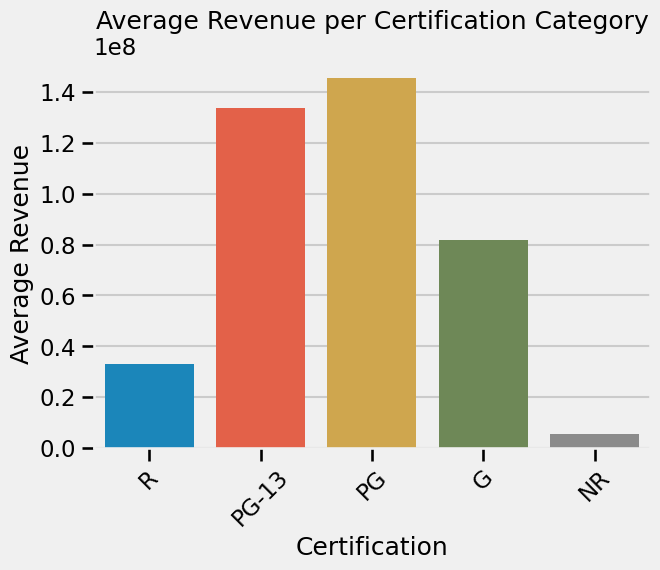

In [10]:
# Plot figure displaying average revenue by certification category 
sns.barplot(data=df_movie_values, x='certification', y='revenue', ci=None, order = cert_index)
plt.xticks(rotation=45)
plt.xlabel("Certification")
plt.ylabel("Average Revenue")
plt.title("Average Revenue per Certification Category")
plt.show()

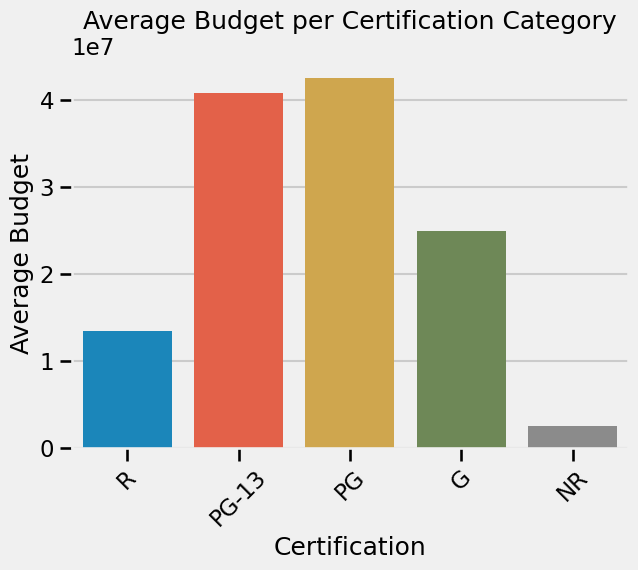

In [11]:
# Plot figure displaying average revenue by certification category 
sns.barplot(data=df_movie_values, x='certification', y='budget', order= cert_index, ci=None)
plt.xticks(rotation=45)
plt.xlabel("Certification")
plt.ylabel("Average Budget")
plt.title("Average Budget per Certification Category")
plt.show()

In [12]:
# Save df as a csv
# Specify the path where you want to save the CSV file
csv_file_path = "Data/API_years2010to2019.csv"

# Use the to_csv method to save the DataFrame to the specified path
df.to_csv(csv_file_path, index=False)  # Set index=False to exclude writing the index to the CSV

# Check if the file has been saved
import os
if os.path.exists(csv_file_path):
    print("DataFrame saved as combined_years.csv in the 'data' folder.")
else:
    print("Error: DataFrame was not saved.")

DataFrame saved as combined_years.csv in the 'data' folder.


## Data Cleaning

In [13]:
df2 = df.copy()

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38409 entries, 0 to 4905
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                38409 non-null  object 
 1   adult                  38399 non-null  float64
 2   backdrop_path          25695 non-null  object 
 3   belongs_to_collection  2556 non-null   object 
 4   budget                 38399 non-null  float64
 5   genres                 38399 non-null  object 
 6   homepage               10093 non-null  object 
 7   id                     38399 non-null  float64
 8   original_language      38399 non-null  object 
 9   original_title         38399 non-null  object 
 10  overview               37605 non-null  object 
 11  popularity             38399 non-null  float64
 12  poster_path            35722 non-null  object 
 13  production_companies   38399 non-null  object 
 14  production_countries   38399 non-null  object 
 15  release_

In [15]:
# FIlter to include only imdb_id, budget, revenue, and certification
df = df[['imdb_id', 'budget', 'revenue', 'certification']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38409 entries, 0 to 4905
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   imdb_id        38409 non-null  object 
 1   budget         38399 non-null  float64
 2   revenue        38399 non-null  float64
 3   certification  8430 non-null   object 
dtypes: float64(2), object(2)
memory usage: 1.5+ MB


In [16]:
# Check for duplicates
df.duplicated().sum()

9

In [17]:
# Remove duplicates
df = df.drop_duplicates()

In [18]:
# Check that duplicates were dropped
duplicates_count = df.duplicated().sum()

print(duplicates_count)

0


In [19]:
# View null value counts
df.isna().sum()

imdb_id              0
budget               1
revenue              1
certification    29970
dtype: int64

In [20]:
# Drop null values
df = df.dropna()

In [21]:
# Verify that null values were dropped
df.isna().sum()

imdb_id          0
budget           0
revenue          0
certification    0
dtype: int64

In [22]:
# Rename imdb_id as 'tconst' to match basics
df.rename(columns = {'imdb_id': 'tconst'}, inplace = True)
df.head()

,tconst,budget,revenue,certification
2,tt0326965,0.0,0.0,PG-13
5,tt0398286,260000000.0,592461732.0,PG
7,tt0411951,30000000.0,967000.0,R
8,tt0419692,0.0,0.0,NR
9,tt0423474,0.0,0.0,R


In [23]:
# Load Title Basics data

basics = pd.read_csv(r"C:\Users\admin\Documents\GitHub\IMDB-Movies-Analysis\Data\basics_compressed_cleaned.csv.gz", low_memory = False)
basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001.0,NaN,118,"Comedy,Fantasy,Romance"
1,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020.0,NaN,70,Drama
2,tt0068865,movie,Lives of Performers,Lives of Performers,0,2016.0,NaN,90,Drama
3,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018.0,NaN,122,Drama
4,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005.0,NaN,100,"Comedy,Horror,Sci-Fi"


In [24]:
# Drop a couple unnecessary columns
basics = basics.drop(columns = ['isAdult', 'titleType'])
basics.head()

,tconst,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,genres
0,tt0035423,Kate & Leopold,Kate & Leopold,2001.0,NaN,118,"Comedy,Fantasy,Romance"
1,tt0062336,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,2020.0,NaN,70,Drama
2,tt0068865,Lives of Performers,Lives of Performers,2016.0,NaN,90,Drama
3,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018.0,NaN,122,Drama
4,tt0088751,The Naked Monster,The Naked Monster,2005.0,NaN,100,"Comedy,Horror,Sci-Fi"


In [25]:
df = pd.merge(df, basics, on = 'tconst', how = 'right')
df.head()

,tconst,budget,revenue,certification,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,genres
0,tt0035423,NaN,NaN,NaN,Kate & Leopold,Kate & Leopold,2001.0,NaN,118,"Comedy,Fantasy,Romance"
1,tt0062336,NaN,NaN,NaN,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,2020.0,NaN,70,Drama
2,tt0068865,NaN,NaN,NaN,Lives of Performers,Lives of Performers,2016.0,NaN,90,Drama
3,tt0069049,12000000.0,0.0,R,The Other Side of the Wind,The Other Side of the Wind,2018.0,NaN,122,Drama
4,tt0088751,NaN,NaN,NaN,The Naked Monster,The Naked Monster,2005.0,NaN,100,"Comedy,Horror,Sci-Fi"


In [26]:
# Drop "originalTitle"
df = df.drop(columns = 'originalTitle')

In [27]:
# Now, we need to load in and add or title ratings
ratings = pd.read_csv('Data/ratings_compressed_cleaned.csv.gz')
ratings.head()


,tconst,averageRating,numVotes
0,tt0035423,6.4,87440
1,tt0062336,6.4,179
2,tt0068865,5.4,74
3,tt0069049,6.7,7810
4,tt0088751,5.2,339


In [28]:
# Merg this with our df
df = pd.merge(df, ratings, on = 'tconst', how = 'right')
df.head()


,tconst,budget,revenue,certification,primaryTitle,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0035423,NaN,NaN,NaN,Kate & Leopold,2001.0,NaN,118,"Comedy,Fantasy,Romance",6.4,87440
1,tt0062336,NaN,NaN,NaN,The Tango of the Widower and Its Distorting Mi...,2020.0,NaN,70,Drama,6.4,179
2,tt0068865,NaN,NaN,NaN,Lives of Performers,2016.0,NaN,90,Drama,5.4,74
3,tt0069049,12000000.0,0.0,R,The Other Side of the Wind,2018.0,NaN,122,Drama,6.7,7810
4,tt0088751,NaN,NaN,NaN,The Naked Monster,2005.0,NaN,100,"Comedy,Horror,Sci-Fi",5.2,339


In [29]:
# Drop rows with NaN values in the 'primaryTitle'
df = df.dropna(subset = 'primaryTitle')

In [30]:
# Drop Certifications that are not of interest

df['certification'] = df['certification'].replace({'-':'drop', 'NC-17':'drop',
                                                   'NR':'drop', '10': 'drop',
                                                   'Unrated':'drop'})
# Filter out rows with 'drop' in the certification column
df = df[df.certification != 'drop']

# Replace the single R anf PG-13 values
df['certification'] = df['certification'].replace({'R ':'R', 'PG-13 ': 'PG-13'})
df['certification'].value_counts()

certification
R        3120
PG-13    1749
PG        797
G         266
Name: count, dtype: int64

In [31]:
# Make a copy df
anova_df = df.copy()

In [32]:
# Drop 0.0 revenue values
anova_df = anova_df[anova_df.revenue != 0.0]

## Does the MPAA rating of a movie (G/PG/PG-13/R) affect how much revenue the movie generates?

H0:  Movie rating does not siginifantly affect the amount of revenue a movie generates.

HA: There is a significant affect of movie rating on the amount of revenue a movie generates.  


We need to assess for outliers using Tukey's rule for Outliers
Tukey's rule states that outliers are those values more than 1.5 times the IQR (Interquartile Range).
Assumptions for Tukey's rule for outliers:
rule states that outliers are those values more than 1.5 times the IQR (Interquartile Range)
    - 1.5 times lower than Q1 (Q1 - 1.5IQR)
    - 1.5 times higher than Q3 (Q3 + 1.5IQR)
Therefore, we need to calculate our Q1, Q3, and IQR. Then, we can find our upper and lower limits, and drop outliers outside that range.

The below code was adapted from: https://www.youtube.com/watch?v=A3gClkblXK8

In [33]:
# Calculate Q1 and Q2
Q1 = anova_df.revenue.quantile(0.25)
Q3 = anova_df.revenue.quantile(0.75)
Q1, Q3

(2133137.75, 95325728.25)

In [34]:
# Calculate IQR
IQR = Q3 - Q1
IQR

93192590.5

In [35]:
# Set upper and lower limit
lower_limit = Q1 - (1.5 * IQR)
upper_limit = Q3 + (1.5 * IQR)
lower_limit, upper_limit

(-137655748.0, 235114614.0)

In [36]:
# Now, we will find and list our outliers
anova_df[(anova_df.revenue < lower_limit) | (anova_df.revenue > upper_limit)]

,tconst,budget,revenue,certification,primaryTitle,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
5603,tt0369610,150000000.0,1.671537e+09,PG-13,Jurassic World,2015.0,NaN,124,"Action,Adventure,Sci-Fi",6.9,664368
6736,tt0398286,260000000.0,5.924617e+08,PG,Tangled,2010.0,NaN,100,"Adventure,Animation,Comedy",7.7,476668
6855,tt0401729,250000000.0,2.841391e+08,PG-13,John Carter,2012.0,NaN,132,"Action,Adventure,Sci-Fi",6.6,281112
8096,tt0433035,110000000.0,2.992685e+08,PG-13,Real Steel,2011.0,NaN,127,"Action,Drama,Sci-Fi",7.1,345439
8210,tt0435761,200000000.0,1.066970e+09,G,Toy Story 3,2010.0,NaN,103,"Adventure,Animation,Comedy",8.3,867615
...,...,...,...,...,...,...,...,...,...,...,...
61174,tt7286456,55000000.0,1.074458e+09,R,Joker,2019.0,NaN,122,"Crime,Drama,Thriller",8.4,1394600
61409,tt7349950,79000000.0,4.731225e+08,R,It Chapter Two,2019.0,NaN,169,"Drama,Fantasy,Horror",6.5,286817
63244,tt7975244,125000000.0,8.016939e+08,PG-13,Jumanji: The Next Level,2019.0,NaN,123,"Action,Adventure,Comedy",6.7,269428
64860,tt8579674,100000000.0,3.946383e+08,R,1917,2019.0,NaN,119,"Action,Drama,War",8.2,639208


In [37]:
# Remove outliers

anova_no_outliers = anova_df[(anova_df.revenue > lower_limit) & (anova_df.revenue < upper_limit)]
anova_no_outliers

,tconst,budget,revenue,certification,primaryTitle,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
1596,tt0249516,65000000.0,73706.0,PG,Foodfight!,2012.0,NaN,91,"Action,Adventure,Animation",1.3,11607
3879,tt0315642,5200000.0,9200000.0,PG-13,Wazir,2016.0,NaN,103,"Action,Crime,Drama",7.1,19607
4507,tt0337692,25000000.0,8784318.0,R,On the Road,2012.0,NaN,124,"Adventure,Drama,Romance",6.0,42803
5151,tt0359950,90000000.0,188133322.0,PG,The Secret Life of Walter Mitty,2013.0,NaN,114,"Adventure,Comedy,Drama",7.3,329823
5411,tt0365907,28000000.0,58834384.0,R,A Walk Among the Tombstones,2014.0,NaN,114,"Action,Crime,Drama",6.5,125231
...,...,...,...,...,...,...,...,...,...,...,...
67036,tt9430698,0.0,81562741.0,PG-13,One Piece: Stampede,2019.0,NaN,101,"Action,Adventure,Animation",7.5,7318
67170,tt9501310,0.0,115570314.0,PG-13,Detective Conan: The Fist of Blue Sapphire,2019.0,NaN,109,"Action,Adventure,Animation",6.2,1839
67386,tt9625664,0.0,92968.0,R,Trauma Center,2019.0,NaN,87,"Action,Thriller",4.0,11708
67778,tt9795368,0.0,1964806.0,R,The Conquest of Siberia,2019.0,NaN,108,"Action,Crime,Drama",5.8,1246


In [38]:
# We need to separate and analyze our groups individually. We have 4 ratings
certifications = {}

# Loop through all unique characteristics
for i in anova_no_outliers['certification'].unique():
    data = anova_no_outliers.loc[anova_no_outliers['certification'] == i,
                                 'revenue'].copy()
    
    # Save results in dictionary
    certifications[i] = data
    
certifications.keys()

dict_keys(['PG', 'PG-13', 'R', 'G'])

In [39]:
# Now, we can assess normality of our certifications (groups)
norm_results = {}

for i, data in certifications.items():
    stat, p = stats.normaltest(data)
    
    # Append norm_results with p-values, test stats, and size of region group
    norm_results[i] = {'n': len(data), 'p': p, 'test stat': stat,}
    
# Convert to a DF
norm_results_df['sig'] = norm_results_df['p'] < 0.05
norm_results_df

NameError: name 'norm_results_df' is not defined

- Variance is not equal.  
- We will perform a Kruskal-Wallis test.


In [ ]:
results_anova = stats.kruskal(*certifications.values())
results_anova

- With p values < 0.05, we reject our null hypothesis.
- There is a significant difference between revenue generated based on the movie rating class. 



## Do movies with longer runtimes (>2 hours) have higher revenue?

H0:  Movie runtime does not siginifantly affect the amount of revenue a movie generates.

HA: There is a significant affect of movie runtime on the amount of revenue a movie generates.

In [ ]:
# Create new DF with no revenue values = 0
length_df = df.copy()
length_df = length_df[length_df.revenue != 0.0]

In [ ]:
# Create 2 dfs for long and short movies
long_movie = length_df.loc[df['runtimeMinutes'] >= 120.0].copy()
short_movie = length_df.loc[df['runtimeMinutes'] < 120.0].copy()

# Get new movie DF info
display(long_movie.info(), short_movie.info())

In [ ]:
# Create a num boolean column to help us with visualizations
length_df['short_movie'] = length_df[['runtimeMinutes']].sum(axis = 1) < 120.0 
length_df

In [ ]:
# Visualize before dealing with outliers
fig, ax = plt.subplots(figsize = (4.2, 4.2))
sns.barplot(data = length_df, x = 'short_movie', y = 'revenue', 
            hue = 'short_movie')
plt.title('Average revenue by movie length');

In [ ]:
# Drop null values so they don't interfere with our statistical test
long_movie.dropna(inplace = True)
short_movie.dropna(inplace = True)

In [ ]:
# Define features of interest
long_revenue = long_movie['revenue']
short_revenue = short_movie['revenue']

In [ ]:
# Check for outliers separately in both groups
zscores_long = stats.zscore(long_revenue)
outliers = abs(zscores_long) > 3
np.sum(outliers)

In [ ]:
# Check for outliers separately in both groups
zscores_short = stats.zscore(short_revenue)
outliers = abs(zscores_short) > 3
np.sum(outliers)

In [ ]:
# Remove Outliers
long_revenue = long_revenue[(np.abs(stats.zscore(long_budget)) < 3)]
short_revenue = short_revenue[(np.abs(stats.zscore(short_budget)) < 3)]

In [ ]:
# Check for normality
result_long_movie = stats.normaltest(long_revenue)
result_long_movie